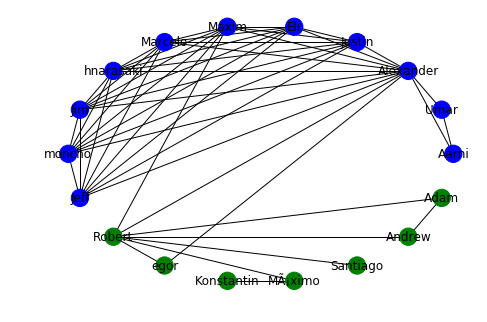

<Figure size 432x288 with 0 Axes>

In [2]:
#simple clustring with girvan nerman 
import networkx as nx
import matplotlib.pyplot as plt

#wihtout vadim
G = nx.read_edgelist('PartenerDeveloperswithoutVadim.txt')

%matplotlib inline



def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

# deleted readme connection 

# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw_circular(G, node_color=color_map, with_labels=True)
plt.show()
plt.savefig("ClusterwithGirwanNewman.png")

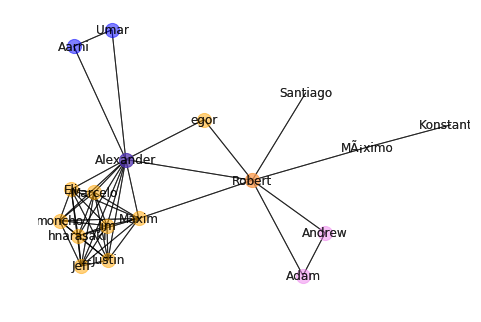

In [8]:
#Developers clustring with community detection
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
import matplotlib.pyplot as plt

tG = nx.read_edgelist('PartenerDeveloperswithoutVadim.txt')
communities = list(k_clique_communities(tG, 3))

%matplotlib inline

pos = nx.spring_layout(tG)
colors = ["violet", "orange", "blue", "green", "indigo", "pink", "red"]
for i in range(len(communities)):
    graph = communities[i]
    node_list = [node for node in graph]
    nx.draw(tG, pos, nodelist=node_list, node_color=colors[i%10], node_size=200, alpha=0.5, with_labels=True)
    
    plt.savefig("CommunityDetection.png")

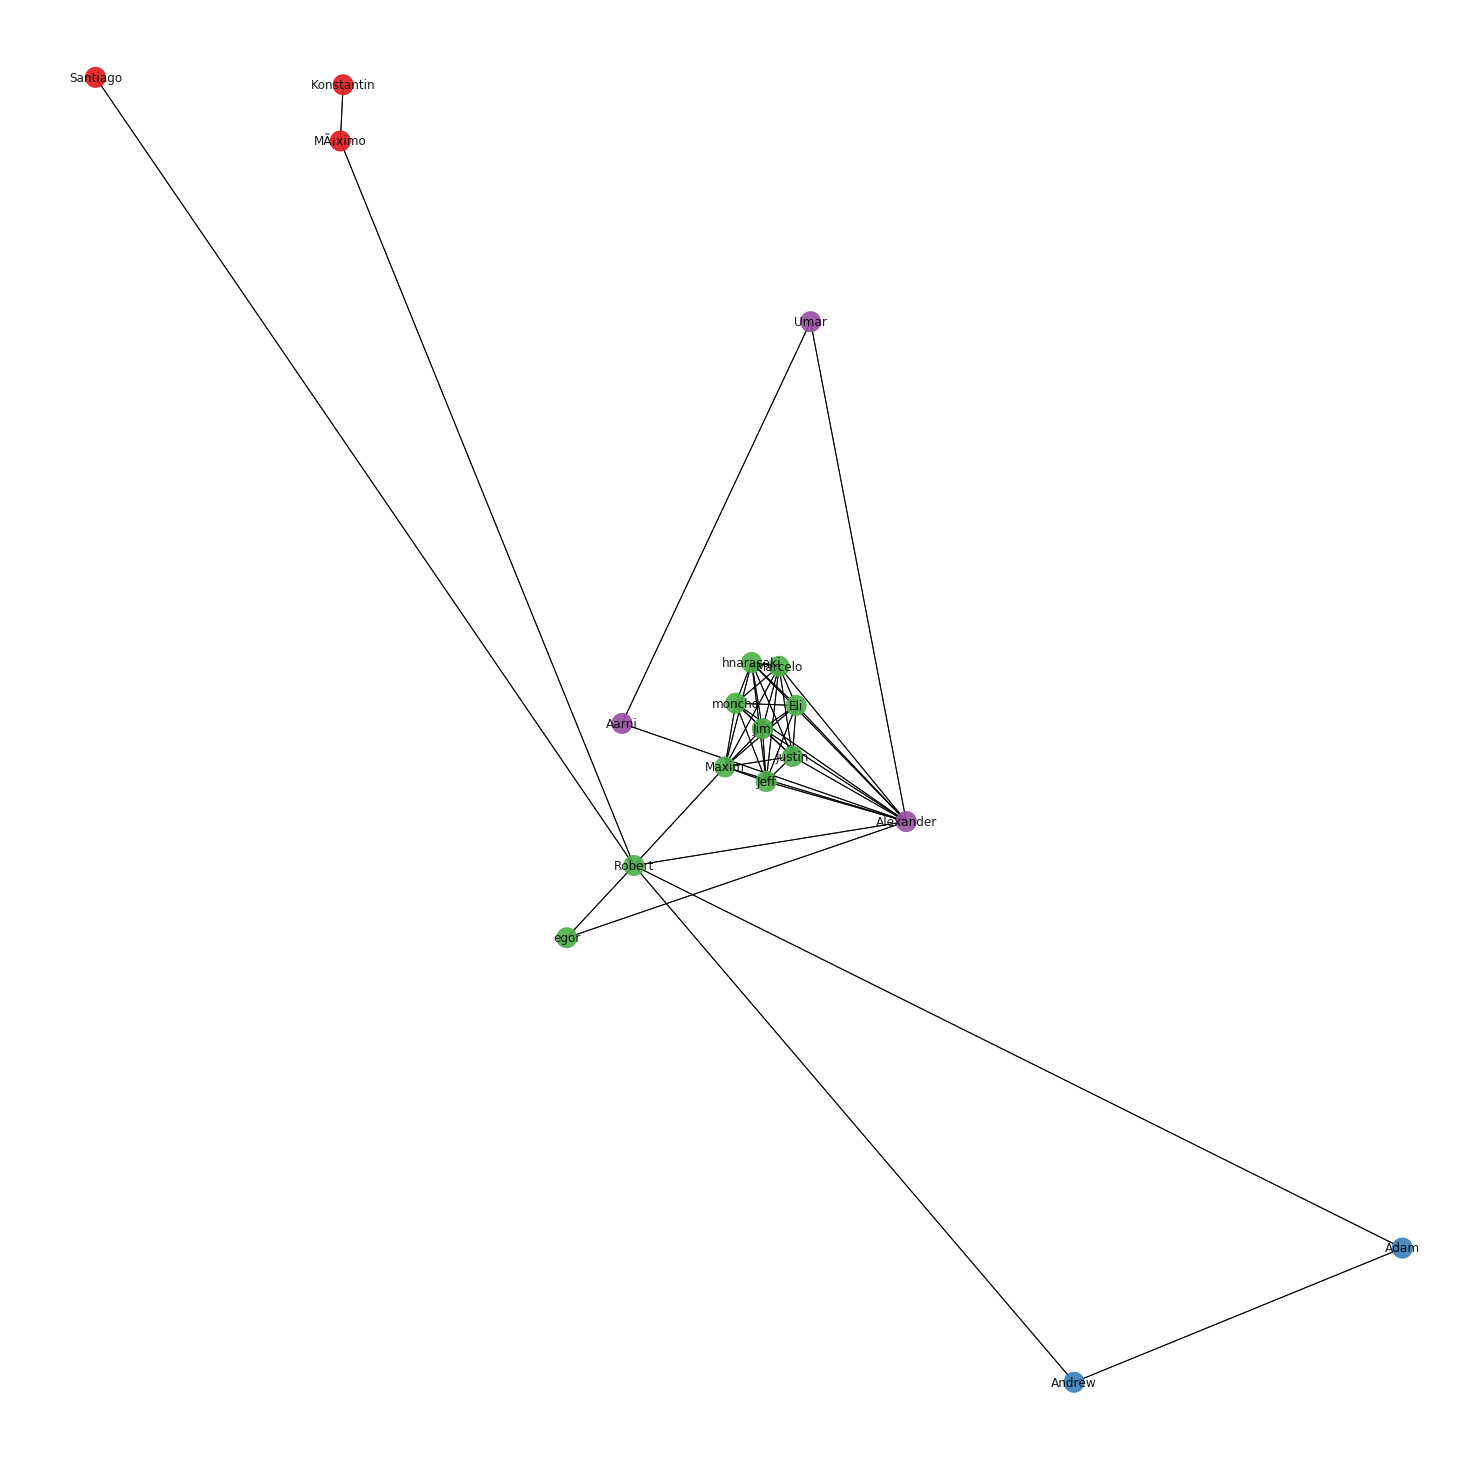

In [17]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos
dict_communities = {}

for i, c in enumerate(communities):
    for node in c:
        dict_communities[node] = i + 1
        
for node in tG:
    if node not in dict_communities.keys():
        dict_communities[node] = -1
pos = community_layout(tG, dict_communities)
from matplotlib import cm
colors = []
for node in tG.nodes:
    colors.append(cm.Set1(dict_communities[node]))
plt.figure(figsize=(20,20))


nx.draw(tG, pos, node_color=colors, node_size=400, alpha=0.9, with_labels=True)
nx.draw_networkx_edges(tG, pos, alpha=0.9)

plt.savefig("CommunityDetection2.png")

Community 0
Community 1
Community 2
Community 3
Community 4


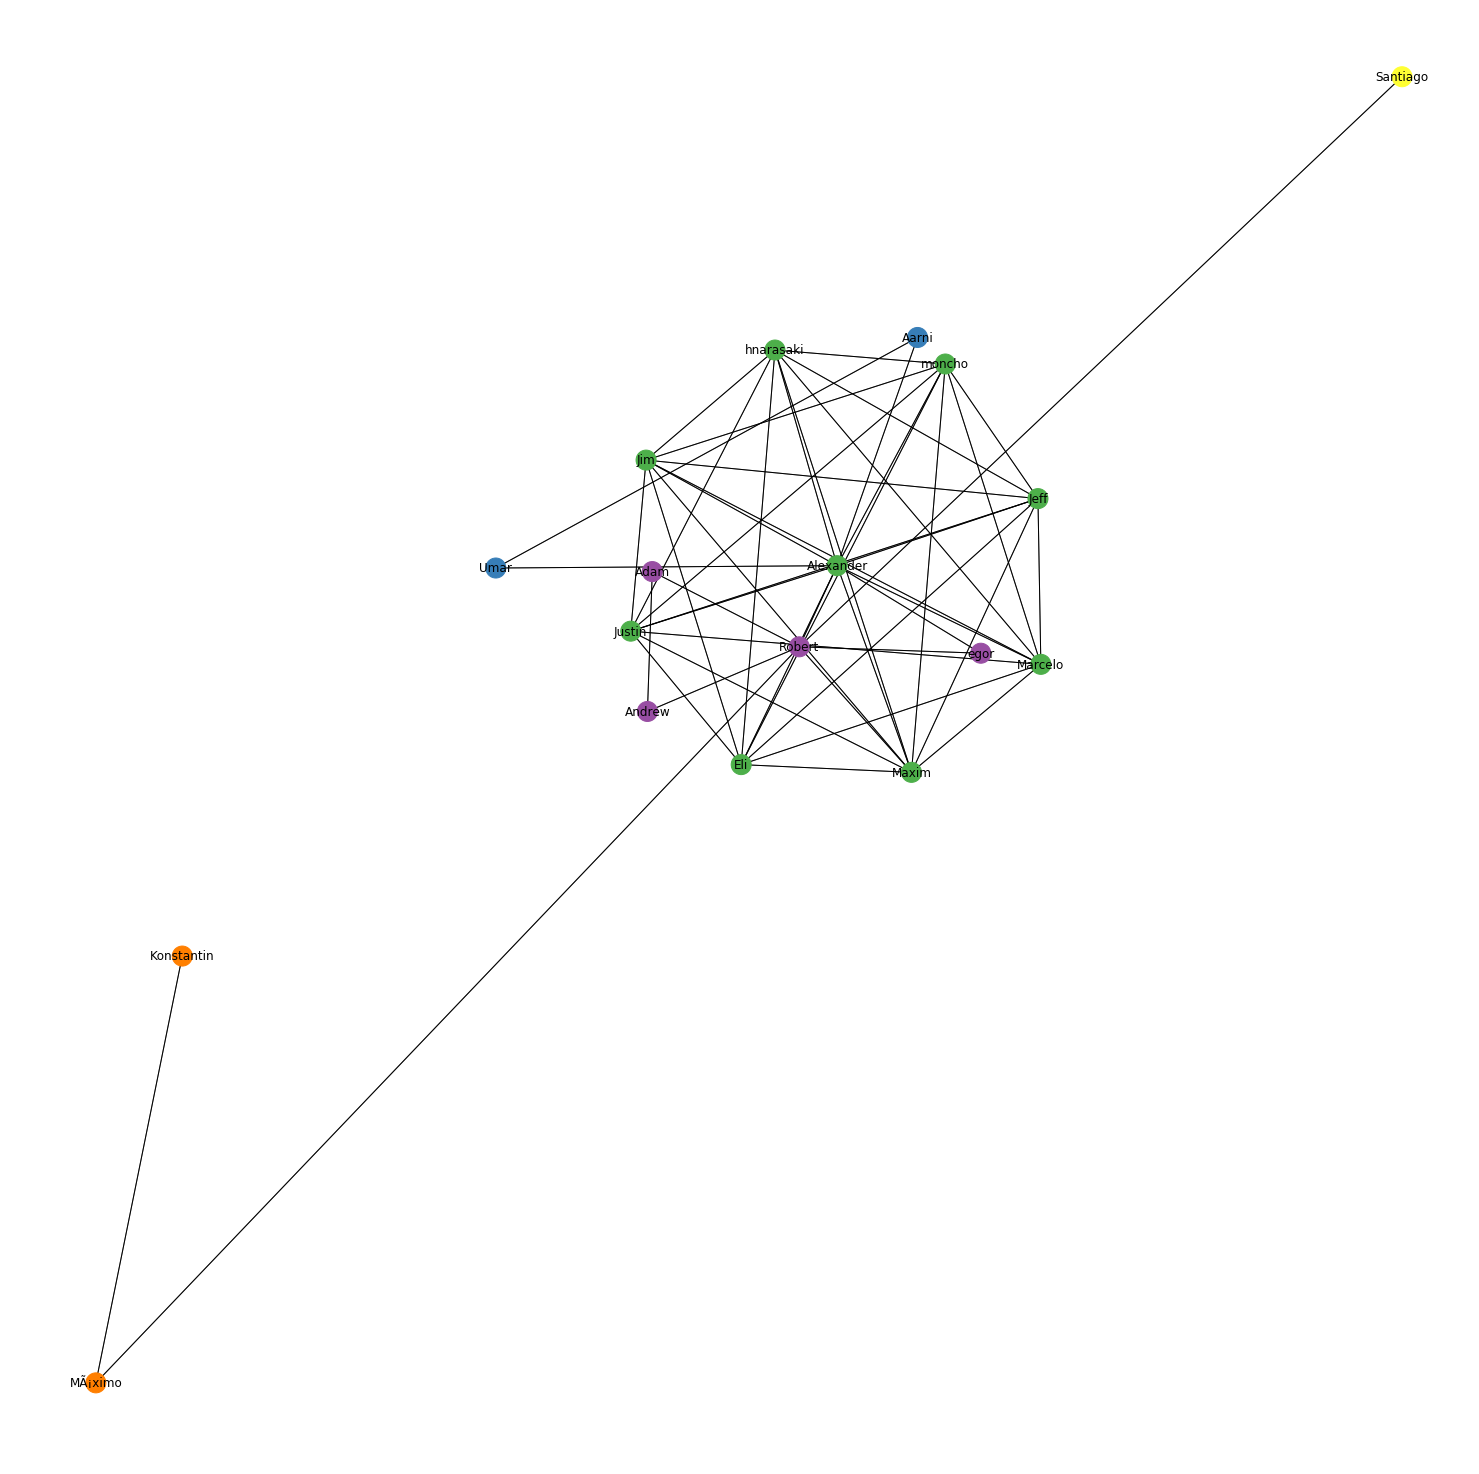

<Figure size 432x288 with 0 Axes>

In [22]:
#newman cluster
from networkx import edge_betweenness_centrality
from random import random

def most_valuable_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)
gn_generator = girvan_newman(tG, most_valuable_edge)
from itertools import islice
gn_communities = next(islice(gn_generator, 3, None)) # Do 3 iterations only
type(gn_communities)
gn_dict_communities = {}

for i, c in enumerate(gn_communities):
    print ("Community {}".format(i))
    for node in c:
        gn_dict_communities[node] = i + 1
        
for node in tG:
    if node not in gn_dict_communities.keys():
        gn_dict_communities[node] = -1
        
gn_pos = community_layout(tG, gn_dict_communities)
from matplotlib import cm
gn_colors = []
for node in tG.nodes:
    gn_colors.append(cm.Set1(gn_dict_communities[node]))
plt.figure(figsize=(20,20))

nx.draw(tG, gn_pos, node_color=gn_colors, node_size=400, with_labels=True )

nx.draw_networkx_edges(tG, gn_pos, alpha=0.5)
plt.axis('off')
plt.show()
plt.savefig("NewmanCluster2.png")